 Meilleur.acteur Meilleure.actrice Meilleur.second.rôle Meilleure.second.rôle
 Min.   :0.00    Min.   :0.00      Min.   :0.00         Min.   : 0.000       
 1st Qu.:0.75    1st Qu.:1.00      1st Qu.:2.75         1st Qu.: 1.000       
 Median :2.00    Median :2.00      Median :3.50         Median : 3.000       
 Mean   :2.50    Mean   :1.75      Mean   :4.00         Mean   : 3.857       
 3rd Qu.:3.50    3rd Qu.:2.25      3rd Qu.:5.25         3rd Qu.: 6.000       
 Max.   :7.00    Max.   :3.00      Max.   :9.00         Max.   :10.000       
                                                        NA's   :1            
 Meilleur.film    Réalisateur        Son            Vidéo      
 Min.   : 2.00   Min.   :2.00   Min.   : 0.00   Min.   : 1.00  
 1st Qu.: 2.75   1st Qu.:3.75   1st Qu.: 9.00   1st Qu.: 6.75  
 Median : 4.50   Median :4.50   Median :10.50   Median :11.50  
 Mean   : 5.00   Mean   :5.00   Mean   :12.88   Mean   :11.88  
 3rd Qu.: 5.75   3rd Qu.:7.00   3rd Qu.:13.00   3rd Qu.:

[1] "Meilleure.second.rôle" "Esthétisme"

[1] "James Cameron"

[1] "Meilleur.acteur"       "Meilleure.actrice"     "Meilleur.second.rôle" 
[4] "Meilleure.second.rôle" "Meilleur.film"         "Réalisateur"          
[7] "Scénario"

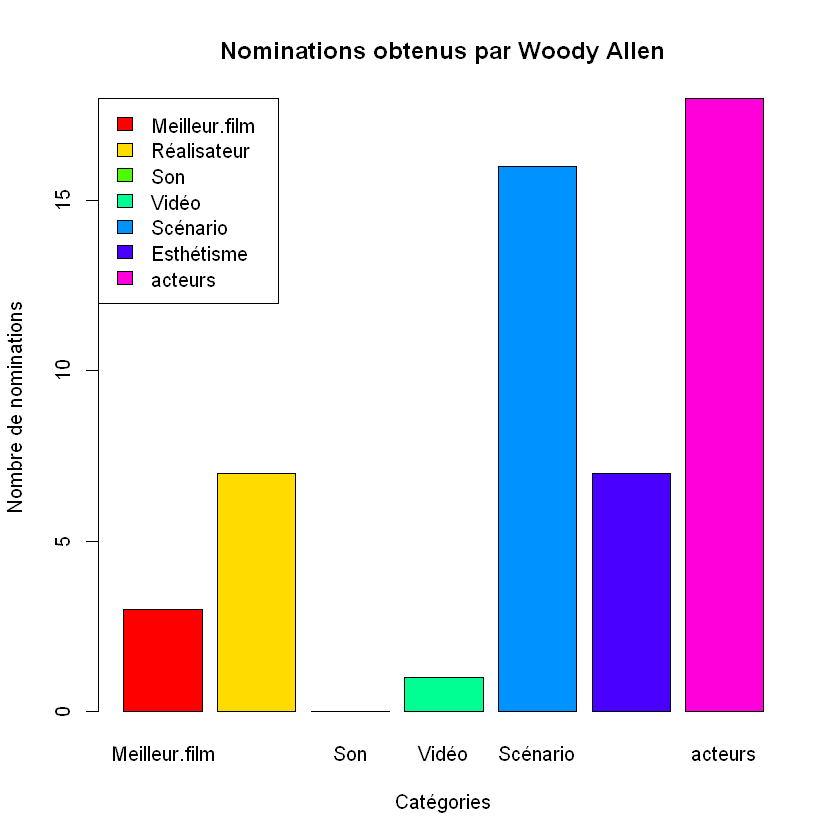

In [1]:
# 1 - Importation
## 1. et 2.
data <- read.table("GroupeA.csv",
                   sep = ",",
                   skip = 7,
                   header = T,
                   encoding = "UTF-8",
                   row.names = 1,
                   na.strings = "DM"
                      )

summary(data)

## 3.
colnames(data)[colSums(is.na(data)) > 0]

## 4.
rownames(data)[which.min(data$Réalisateur)]

## 5.
data$Moyenne <- rowMeans(data, na.rm = T)

colnames(data)[which(data["James Cameron",] < data["James Cameron",]$Moyenne)]

## 6.
data <- rbind(data, colMeans(data, na.rm = T))
row.names(data)[9] <- "MOYENNE"

## 7.
wallen <- data["Woody Allen",]
wallen$acteurs <- rowSums(wallen[,1:4])
wallen[,1:4] <- rep(NULL,4)
wallen[,"Moyenne"] <- NULL

barplot(t(wallen)[,1],
        main = "Nominations obtenus par Woody Allen",
        ylab = "Nombre de nominations",
        xlab = "Catégories",
        col = rainbow(7)
       )

legend("topleft",
       legend = colnames(wallen),
       fill= rainbow(7)
      )

## 8.
na <- which(is.na(data), arr.ind=TRUE)
data[na] <- rowMeans(data, na.rm=TRUE)[na[,1]]

# 2 - Simulation
## 2.1 Lois discrètes
### 1.
X <- function(p,x){
    N <- length(x)
    U <- runif(1)
    if (U <= p[1]){
        X <- x[1]
    } else {
        for (k in 2:N) {
            if(sum(p[1:(k-1)]) < U & U <= sum(p[1:k])) {
                X <- x[k]
            }
        }
    }
    return(X)
}

### 2.
SampleX <- function(p, x, n = 1){
    X <- rep(0,n)
    for (i in 1:n){
        X[i] <- X(p,x)
    }
    return(X)
}

## 2.2 Lois continues
### 2.2.1 Simulation à partir d'une autre
#### 1.
MyChi2 <- function(k){
    if (k<1) {
        ch <- "Erreur: k inférieur à 1"
    } else {
        ch <- sum(rnorm(k, mean = 0, sd = 1)^2)
    }
    return(ch)
}

#### 2.
MyUnif <- function(a,b){
    U <- runif(1)
    if (a>0 & b>1){
        X <- U+a
    } else if (a>0 & b<1) {
        X <- U+a-b
    } else if (a<0 & b <1) {
        X <- U-a-b
    } else if (a<0 & b<1) {
        X <- U-b
    } else {
        X <- U
    }
    return(X)
}

### 2.2.2 Simulation à partir d'une fonction de répartition
Exp <- function(l = 1,n = 1){
    if (l < 0) {
        X <- "Erreur: lambda négative"
    } else {
        X <- rep(0,n)
        for (i in 1:n){
            U <- runif(1)
            X[i] <- -(1/l)*log(1-U)
        }
    }
    return(X) 
}